<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/04_05_pvaluesandconfidence_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [ ]:
'''
There is a close relationship between hypothesis and confidence intervals. 
To highlight this, we're going to use an example of an election poll, but now
in the form of hypothesis testing.
'''

In [1]:
import math
import io
import os

In [2]:
os.chdir('sample_data')

In [15]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
poll = pd.read_csv('poll.csv')

In [6]:
'''
In the smaller poll, Brown seemed to have the majority of votes.

The null hypothesis will be that Green will win or tie the election. This means
that the true Brown fraction will be .50 or less. We need to find out whether a
Brown proportion of .511 is an extreme result if the null hypothesis holds. So
we compute the sampling distribution of the proportion under true Brown fraction
of .50. If it's lower than that, the p-value will be even lower, so we work with
Brown = .50.
'''
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [7]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [8]:
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

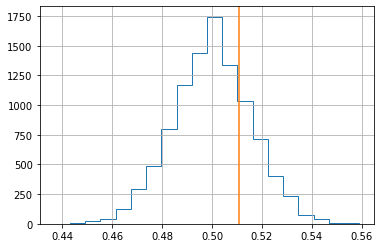

In [16]:
'''
We see that .511 is not a very extreme value in the histogram.
'''
dist.Brown.hist(histtype='step',bins=20)
plt.axvline(0.511,c='C1')

In [10]:
'''
If we look at it's quantile, we see that it's in the 24% range and defintely not
an extreme value for the null hypothesis. It is not enough to reject the null
hypothesis that Green ties or wins the election.
'''
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

24.260000000000005

In [12]:
'''
For the larger sample (below), it makes sense to set the null hypothesis of Brown
=> .50 as as Green holds the majority.

"In fact, a nice feature of binary problems, such as this, is that the null 
hypothesis and its alternative are complementary."
'''
largepoll = pd.read_csv('poll-larger.csv')

In [13]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [17]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

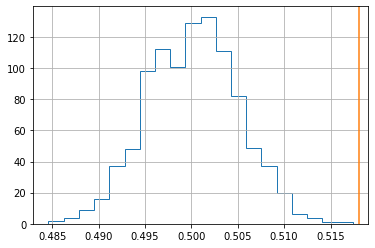

In [19]:
'''
The value is extreme that it lies outside the maximum value of the distribution.
'''
dist.Green.hist(histtype='step',bins=20)
plt.axvline(0.5181,c='C1')

In [20]:
'''
I cannot even get a % value for the distribution. It's so extreme that the
probability of Green having 51% votes, while Brown ties or wins the election, 
is 1/1000 chance. This p-value is very significant, and thus, we can reject the
null hypothesis. 
'''
100 - scipy.stats.percentileofscore(dist.Green,0.5181)

0.0

In [ ]:
'''
"An interesting question is whether we can apply bootsrapping to compute the values.
It is trivial as bootstrapping can only represent the true distribution, not the 
distribution under the null hypothesis. So we would need to modify the bootstrap
values to be appropriate for the null case. In some cases this is straightforward
and others impossible. Certainly, it requires some thinking and problem specific
information."
'''